In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
df = pd.read_csv('owid_climate_data.csv')

In [4]:
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())

print("\n=== BASIC STATISTICS ===")
print(df.describe())

print("\n=== DATA INFO ===")
print(df.info())

print("\n=== UNIQUE VALUES ===")
print(f"Countries: {df['country'].unique()}")
print(f"Year range: {df['year'].min()} to {df['year'].max()}")

=== DATASET OVERVIEW ===
Shape: (340, 4)
Columns: ['country', 'year', 'co2', 'temperature']

First few rows:
     country  year   co2  temperature
0  Australia  1990  2.44         0.36
1  Australia  1991  0.46         0.42
2  Australia  1992  0.63         0.49
3  Australia  1993  0.26         0.41
4  Australia  1994  2.13         0.50

=== BASIC STATISTICS ===
              year         co2  temperature
count   340.000000  340.000000   340.000000
mean   2006.500000    2.357176     0.728706
std       9.825168    2.086260     0.207490
min    1990.000000    0.200000     0.320000
25%    1998.000000    1.080000     0.550000
50%    2006.500000    1.780000     0.740000
75%    2015.000000    2.470000     0.910000
max    2023.000000   12.130000     1.160000

=== DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      340 non-null    

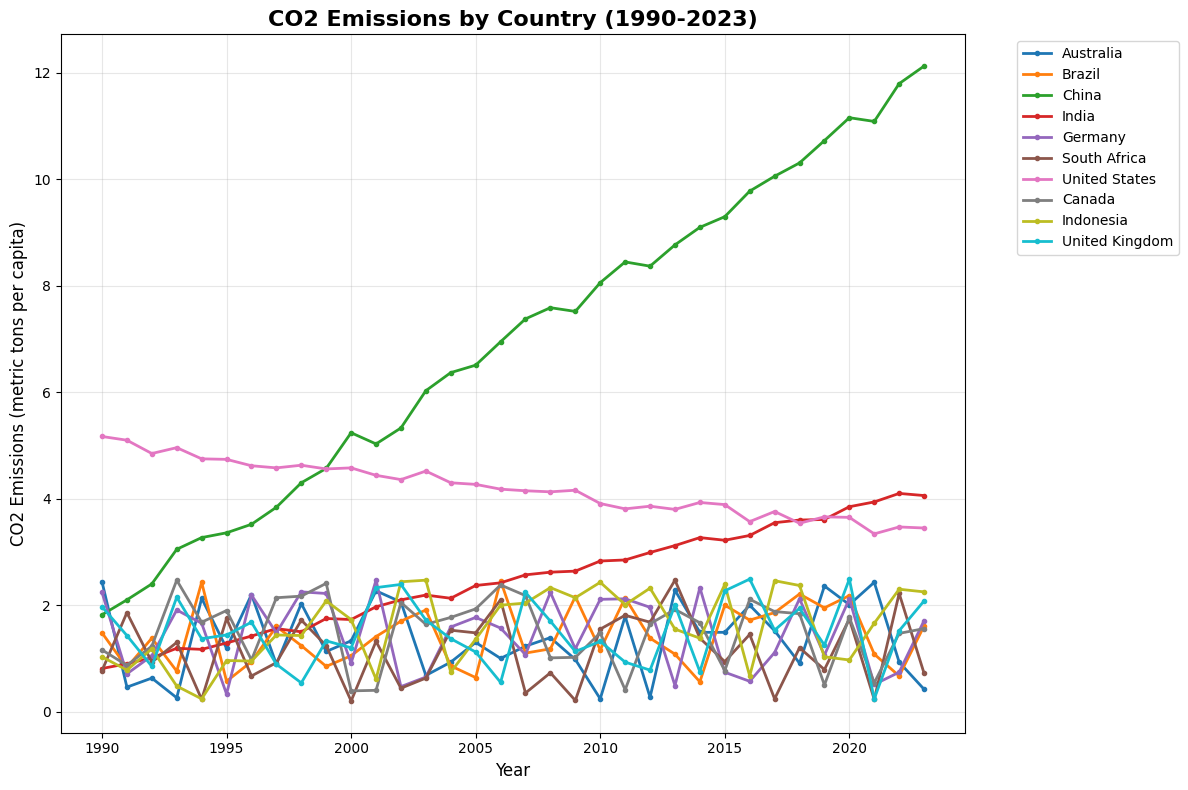

In [5]:
plt.figure(figsize=(12, 8))
for country in df['country'].unique():
    country_data = df[df['country'] == country]
    plt.plot(country_data['year'], country_data['co2'], 
             label=country, linewidth=2, marker='o', markersize=3)

plt.title('CO2 Emissions by Country (1990-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Emissions (metric tons per capita)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

TypeError: regplot() got an unexpected keyword argument 'linewidth'

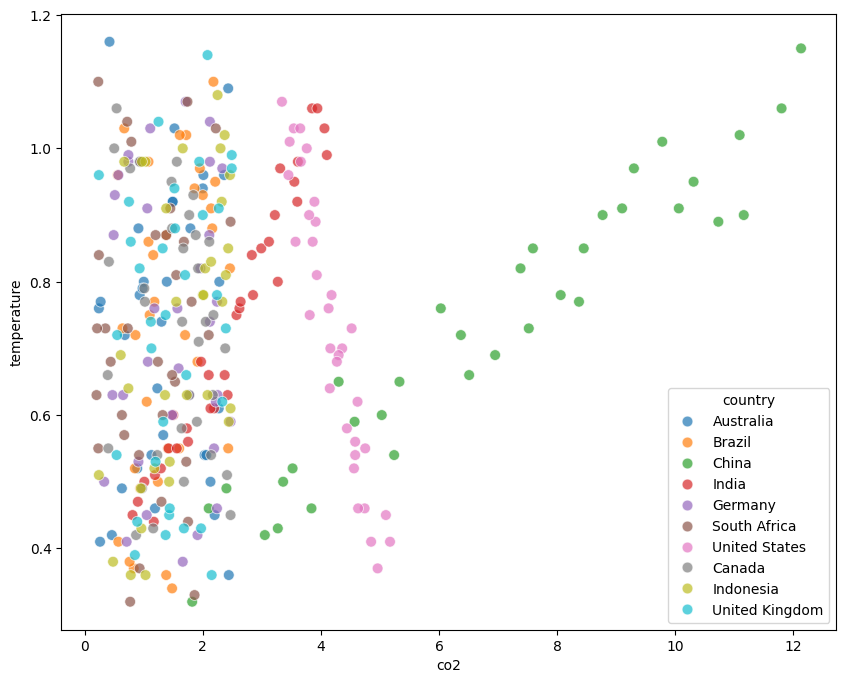

In [6]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='co2', y='temperature', 
                hue='country', s=60, alpha=0.7)
sns.regplot(data=df, x='co2', y='temperature', 
            scatter=False, color='red', linewidth=2)

plt.title('CO2 Emissions vs Temperature Change (1990-2023)', fontsize=16, fontweight='bold')
plt.xlabel('CO2 Emissions (metric tons per capita)', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
correlation = df['co2'].corr(df['temperature'])
print(f"\n=== CORRELATION ANALYSIS ===")
print(f"Overall CO2-Temperature correlation: {correlation:.3f}")


=== CORRELATION ANALYSIS ===
Overall CO2-Temperature correlation: 0.191


In [8]:
early_period = df[df['year'].between(1990, 1995)].groupby('country')['co2'].mean()
recent_period = df[df['year'].between(2020, 2023)].groupby('country')['co2'].mean()

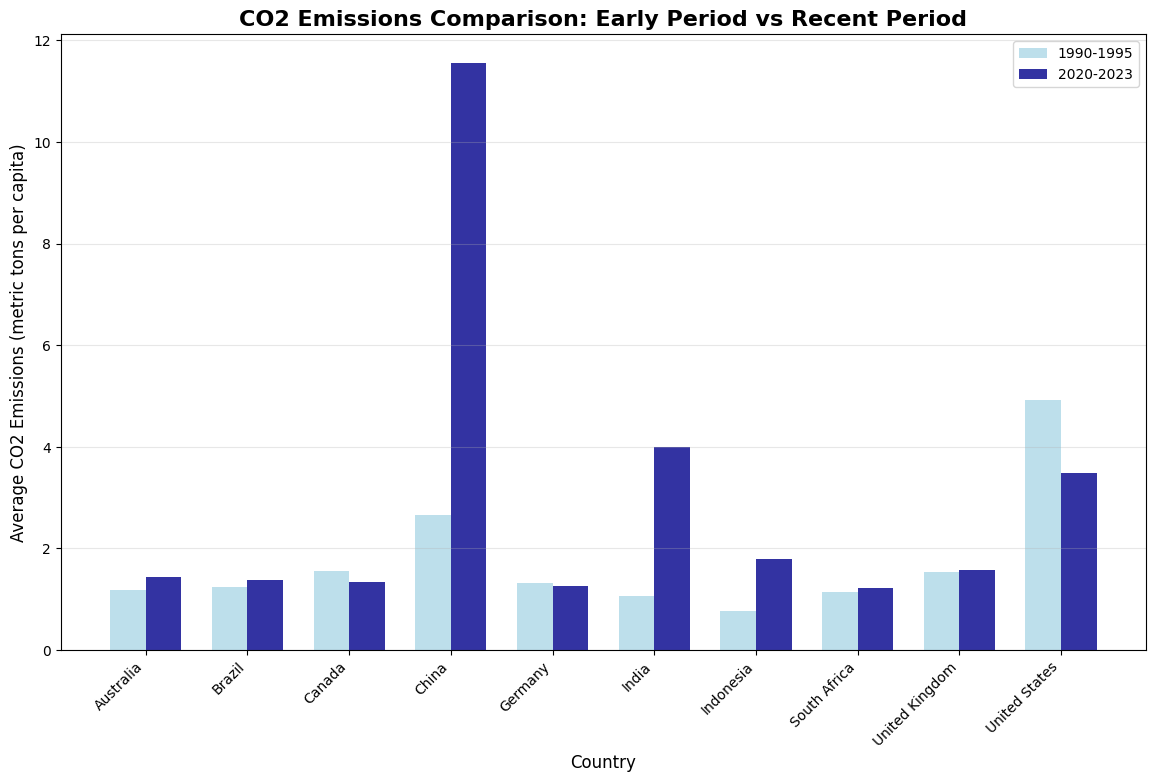

In [9]:
x = np.arange(len(early_period))
width = 0.35

plt.figure(figsize=(14, 8))
bars1 = plt.bar(x - width/2, early_period.values, width, 
                label='1990-1995', alpha=0.8, color='lightblue')
bars2 = plt.bar(x + width/2, recent_period.values, width, 
                label='2020-2023', alpha=0.8, color='darkblue')

plt.xlabel('Country', fontsize=12)
plt.ylabel('Average CO2 Emissions (metric tons per capita)', fontsize=12)
plt.title('CO2 Emissions Comparison: Early Period vs Recent Period', fontsize=16, fontweight='bold')
plt.xticks(x, early_period.index, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

C:\Users\micha\AppData\Local\Temp\ipykernel_98100\3234081455.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


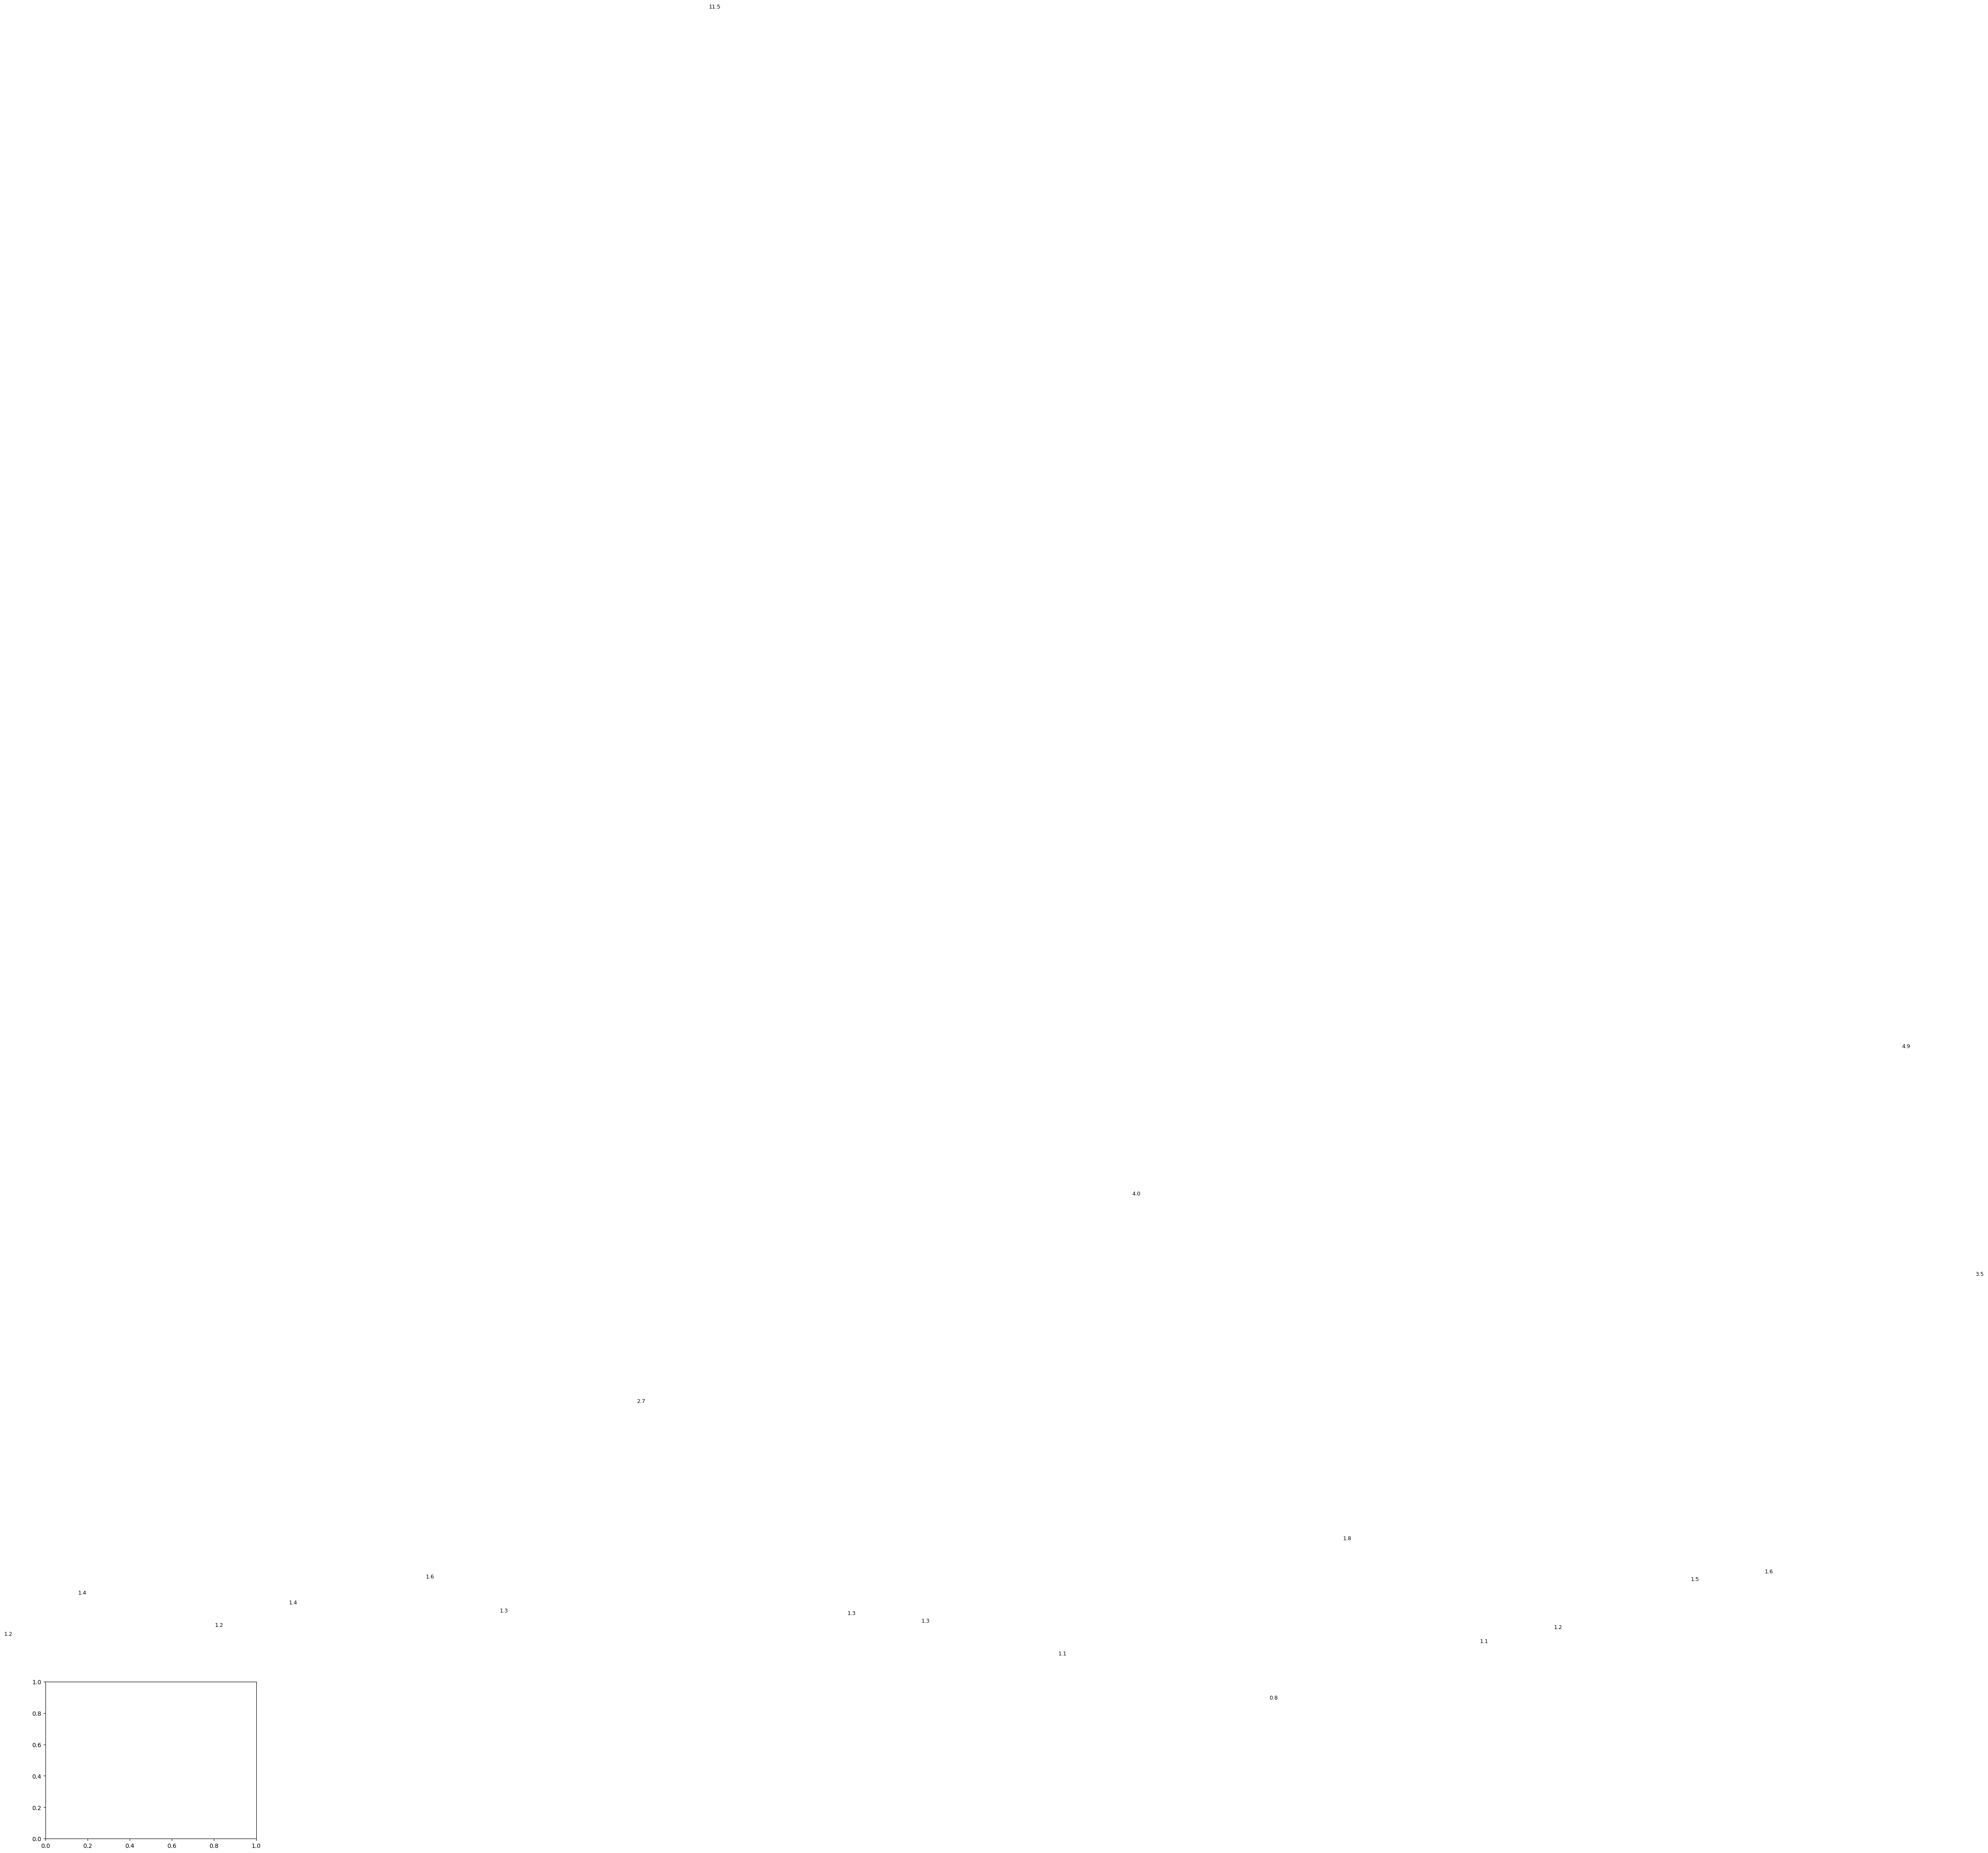

In [10]:
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [11]:
print("\n=== DETAILED STATISTICS BY COUNTRY ===")
country_stats = df.groupby('country')[['co2', 'temperature']].agg(['mean', 'std', 'min', 'max'])
print(country_stats.round(3))


=== DETAILED STATISTICS BY COUNTRY ===
                  co2                     temperature                   
                 mean    std   min    max        mean    std   min   max
country                                                                 
Australia       1.373  0.692  0.24   2.44       0.727  0.217  0.36  1.16
Brazil          1.416  0.566  0.56   2.46       0.738  0.228  0.34  1.10
Canada          1.510  0.627  0.39   2.47       0.724  0.184  0.42  1.06
China           6.920  3.041  1.82  12.13       0.733  0.212  0.32  1.15
Germany         1.460  0.680  0.33   2.47       0.730  0.207  0.38  1.07
India           2.460  0.993  0.81   4.10       0.731  0.192  0.44  1.06
Indonesia       1.595  0.690  0.24   2.47       0.728  0.214  0.36  1.08
South Africa    1.141  0.637  0.20   2.47       0.723  0.214  0.32  1.10
United Kingdom  1.500  0.610  0.24   2.49       0.727  0.220  0.36  1.14
United States   4.197  0.507  3.34   5.17       0.726  0.209  0.37  1.07


In [13]:
print("\n=== EMISSION TRENDS BY COUNTRY ===")
print("Country | Slope (tons/year) | R-squared | P-value")
print("-" * 50)

for country in df['country'].unique():
    country_data = df[df['country'] == country]
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        country_data['year'], country_data['co2'])
    print(f"{country:<15} | {slope:>8.4f} | {r_value**2:>8.3f} | {p_value:>7.4f}")


=== EMISSION TRENDS BY COUNTRY ===
Country | Slope (tons/year) | R-squared | P-value
--------------------------------------------------
Australia       |   0.0054 |    0.006 |  0.6628
Brazil          |   0.0138 |    0.059 |  0.1663
China           |   0.3049 |    0.997 |  0.0000
India           |   0.0995 |    0.996 |  0.0000
Germany         |  -0.0079 |    0.013 |  0.5164
South Africa    |   0.0052 |    0.007 |  0.6484
United States   |  -0.0500 |    0.967 |  0.0000
Canada          |  -0.0066 |    0.011 |  0.5545
Indonesia       |   0.0324 |    0.218 |  0.0053
United Kingdom  |   0.0052 |    0.007 |  0.6333


In [15]:
print("\n=== KEY FINDINGS ===")
latest_year = df['year'].max()
latest_data = df[df['year'] == latest_year].sort_values('co2', ascending=False)

print(f"\nHighest CO2 emitters in {latest_year}:")
for i, row in latest_data.head(3).iterrows():
    print(f"{row['country']}: {row['co2']:.2f} tons per capita")

print(f"\nLowest CO2 emitters in {latest_year}:")
for i, row in latest_data.tail(3).iterrows():
    print(f"{row['country']}: {row['co2']:.2f} tons per capita")



=== KEY FINDINGS ===

Highest CO2 emitters in 2023:
China: 12.13 tons per capita
India: 4.06 tons per capita
United States: 3.45 tons per capita

Lowest CO2 emitters in 2023:
Canada: 1.56 tons per capita
South Africa: 0.72 tons per capita
Australia: 0.42 tons per capita


In [16]:
print(f"\nHighest temperature increases in {latest_year}:")
temp_data = df[df['year'] == latest_year].sort_values('temperature', ascending=False)
for i, row in temp_data.head(3).iterrows():
    print(f"{row['country']}: {row['temperature']:.2f}°C above baseline")

print("\n=== ANALYSIS COMPLETE ===")
print("Use these statistics and visualizations for your 1,000-word report!")


Highest temperature increases in 2023:
Australia: 1.16°C above baseline
China: 1.15°C above baseline
United Kingdom: 1.14°C above baseline

=== ANALYSIS COMPLETE ===
Use these statistics and visualizations for your 1,000-word report!
